In this file I will get some mock data (from chat gpt) and see if I can recreate something roughly similar to Figure 1 from Stephens, 2017. (https://ui.adsabs.harvard.edu/abs/2017ApJ...851...55S/abstract)

A good reference for the beam size using fits would be: https://radio-beam.readthedocs.io/en/latest/

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
import matplotlib.colors as mcolors
from radio_beam import Beam
import astropy.units as u
from matplotlib.patches import Ellipse
import seaborn as sns

In [4]:
# Font sizes
title_fs = 25
axis_label_fs = 20
axis_num_fs = 20
legend_fs = 20
cbar_fs = 20
text_fs = 28

In [5]:
# Set up the grid for the plot (mock coordinates)
x = np.linspace(38.30, 38.55, 20)  # RA in degrees (mock J2000)
y = np.linspace(55, 59, 20)  # Dec in degrees (mock J2000)
X, Y = np.meshgrid(x, y)

In [6]:
P = np.abs(np.sin(X) * np.cos(Y)) * 100
theta = np.random.uniform(0, 2 * np.pi, X.shape)  # Random polarization angles

In [7]:
# Create mock Stokes I data as a 2D Gaussian (for intensity contours)
sigma = 0.6
Stokes_I = np.exp(-(X**2 + Y**2) / (2 * sigma**2)) * 1000

In [8]:
xmin = 0
xmax = 100

ymin = 0
ymax = 100

In [9]:
# Generate random data for contour lines
x = np.linspace(xmin, xmax, 100)
y = np.linspace(ymin, ymax, 100)
X, Y = np.meshgrid(x, y)
# Circular data with high values at the edges and lower (blue) values near the center
Z = 5 * np.exp(-((X - 50)**2 + (Y - 50)**2) / (2 * 15**2)) 

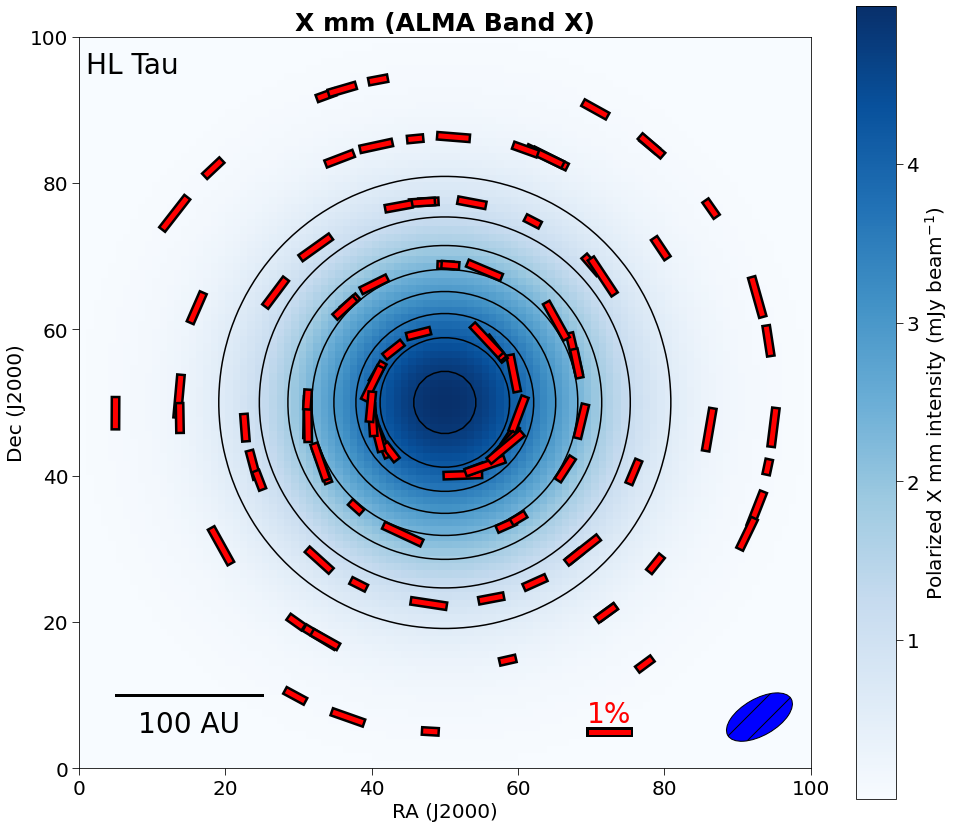

In [14]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 12))

# Set axis limits
ax.set_xlim(xmin, xmax)  # Replace xmin and xmax with your desired limits for the x-axis
ax.set_ylim(ymin, ymax)  # Replace ymin and ymax with your desired limits for the y-axis

# Plot the contour lines
contour = ax.contour(X, Y, Z, levels=8, colors='black')  # 8 solid contour levels
# ax.clabel(contour, inline=True, fontsize=10, fmt="%.1f")  # Label contours


# Display the color map with mostly white and shades of blue within contours
im = ax.imshow(Z, extent=(xmin, xmax, ymin, ymax), origin='lower', cmap='Blues')

# Add a colorbar for the polarized intensity
cbar = plt.colorbar(im, ax=ax)
cbar.set_label(r'Polarized X mm intensity (mJy beam$^{-1}$)', fontsize=cbar_fs)


# Add the circle in the bottom left for the beam size (simulated)
# beam_size = 0.2  # Arbitrary beam size
# beam_circle = patches.Circle((-1.8, -1.8), beam_size, color='black', fill=False, lw=2)
# ax.add_patch(beam_circle)

# Labels and title
ax.set_title('X mm (ALMA Band X)', fontsize=title_fs, fontweight='bold')
ax.set_xlabel('RA (J2000)', fontsize=axis_label_fs)
ax.set_ylabel('Dec (J2000)', fontsize=axis_label_fs)

# Add the "HL Tau" label in the top left corner
ax.text(xmin + 1, ymax - 2, 'HL Tau', fontsize=text_fs, ha='left', va='top')

# Add line and text for 100 AU
# ------------------------------------------------------------------------------------------
length_100_au_in_deg = 20 # 0.0277
x_start = 5
y_pos = 10
ax.plot([x_start, x_start + length_100_au_in_deg], [y_pos, y_pos], color='black', linewidth=3)
ax.text(x_start + length_100_au_in_deg/2, y_pos - 2, '100 AU', fontsize=text_fs, ha='center', va='top')



# Generate random points along the contour circles with tangential vectors
np.random.seed(42)  # For reproducibility
num_points = 100  # Number of random points
lengths = np.random.uniform(1, 5, num_points)  # Random lengths for vectors

for radius in np.linspace(10, 45, 5):  # Different radii for concentric circles
    for _ in range(num_points // 5):
        # Random angle to position around the circle
        angle_rad = np.random.uniform(0, 2 * np.pi)
        
        # Calculate x, y position along the circle
        x_pos = 50 + radius * np.cos(angle_rad)
        y_pos = 50 + radius * np.sin(angle_rad)
        
        # Tangential direction (perpendicular to the radial direction)
        tangent_angle = angle_rad + np.pi / 2
        length = np.random.choice(lengths)  # Choose a random vector length
        
        # Polarization vector (tangential to the circle at (x_pos, y_pos))
        dx = length * np.cos(tangent_angle)
        dy = length * np.sin(tangent_angle)
        ax.plot([x_pos, x_pos + dx], [y_pos, y_pos + dy], color='black', linewidth=10)
        ax.plot([x_pos, x_pos + dx], [y_pos, y_pos + dy], color='red', linewidth=5)



# Add beam
# ----------------------------------------------------------------------------------------
# beam_size_deg = 10  # Beam size 
# beam_circle = patches.Circle((xmax - beam_size_deg/2, ymin + beam_size_deg/2), 
#                              radius=beam_size_deg/2, 
#                              color='blue', 
#                              fill=True, 
#                              lw=2)
# ax.add_patch(beam_circle)

# Parameters
beam_size_deg = 10  # Major axis in degrees
beam_minor_deg = 5  # Minor axis in degrees
beam_pa_deg = 30     # Position angle in degrees

beam_ellipse = Ellipse(
    (93, 7),                # Center of the ellipse
    width=beam_size_deg,     # Major axis
    height=beam_minor_deg,   # Minor axis
    angle=beam_pa_deg,       # Rotation angle
    edgecolor='black',       # Edge color
    facecolor='blue',        # Fill color
    alpha=1,                 # Transparency
    hatch='/'                # Diagonal hatch pattern
)

# Add the beam to the plot
ax.add_patch(beam_ellipse)


# Set specific coordinates
x_start = 70 
line_length =5  
y_position = 5

# Add the red line outlined in black
red_line_outline = ax.plot([x_start, x_start + line_length], [y_position, y_position], color='black', linewidth=10)
red_line = ax.plot([x_start, x_start + line_length], [y_position, y_position], color='red', linewidth=5)

# Add text above the line
ax.text(x_start + line_length / 2, y_position + 0.5, '1%', fontsize=text_fs, color='red', ha='center', va='bottom')



# Adjust axis labels and ticks for the main plot
# ----------------------------------------------------------------------------------------
ax.tick_params(labelsize=axis_num_fs, which='major', length=7)
ax.tick_params(which='minor', length=4)

# Adjust axis labels and ticks for the colorbar
cbar.ax.tick_params(labelsize=axis_num_fs, which='major', length=7)
cbar.ax.tick_params(which='minor', length=4)

plt.tight_layout()
plt.show()